<a href="https://colab.research.google.com/github/sgscheffler/random/blob/master/flight_search_results_experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

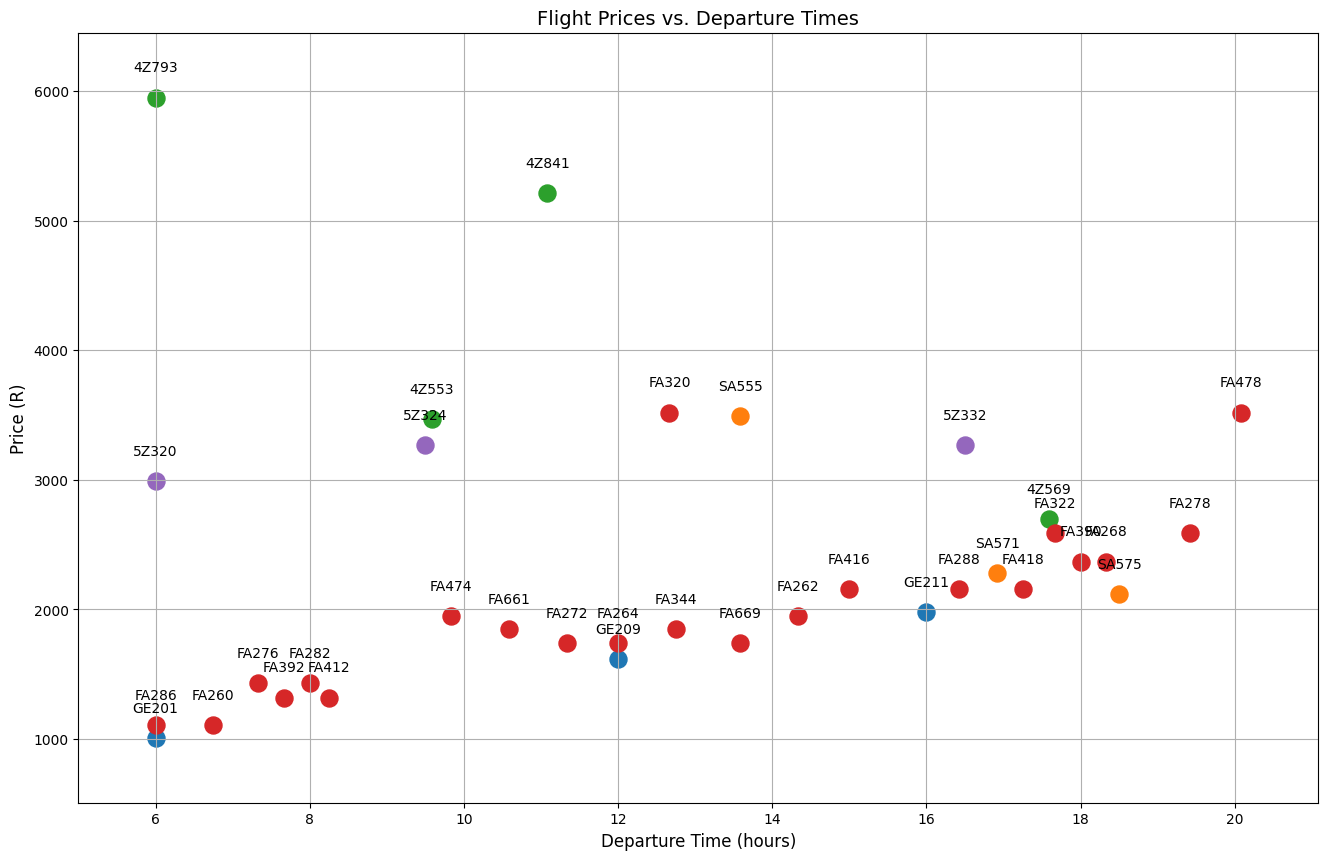

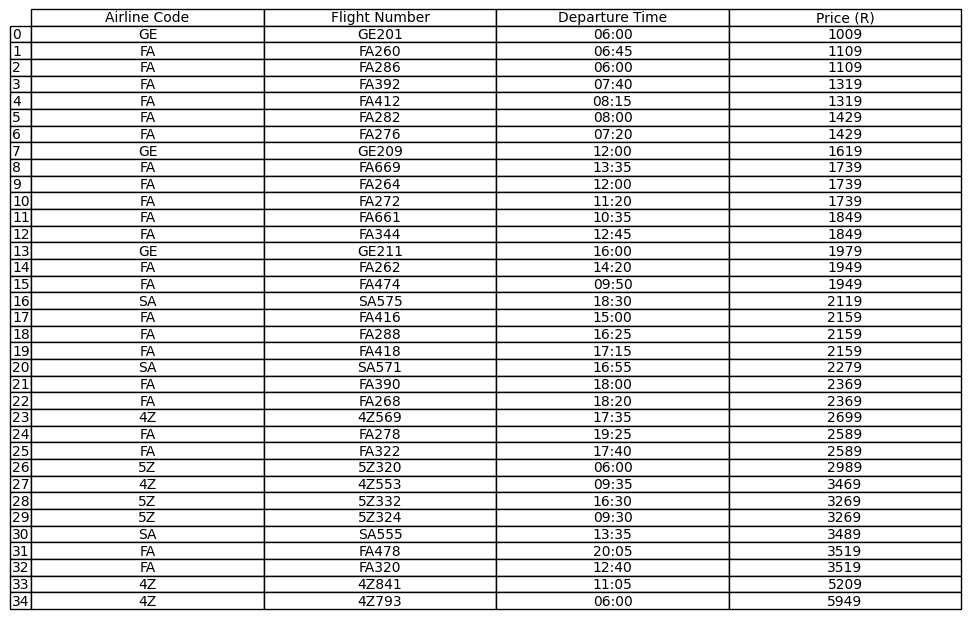

<ipython-input-7-be350802670e>:110: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('Spectral')


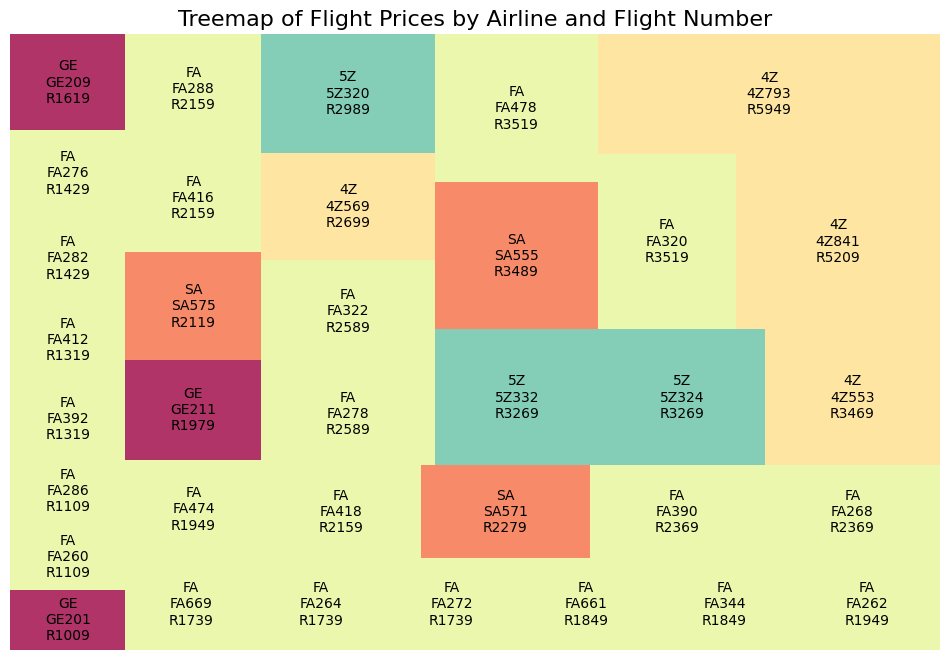

In [7]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import table  # Import the table function

import json
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Function to parse departure time from a datetime string
def parse_time_to_float(time_str):
    time_part = time_str.split('T')[1]
    hours, minutes, _ = map(int, time_part.split(':'))
    return hours + minutes / 60

# Load the JSON data from the file
file_path = 'flightsearch.json'  # Adjusted to the uploaded file path
with open(file_path, 'r') as file:
    flight_data = json.load(file)

# Extract itineraries
itineraries = flight_data['response']['itineraries']

# Extracting unique airlines and assigning colors
airlines = set()
for itinerary in itineraries:
    airline_code = itinerary['odoList'][0]['segments'][0]['airlineCode']
    airlines.add(airline_code)

# Assigning unique colors to each airline
colors = list(mcolors.TABLEAU_COLORS)  # Using a predefined set of colors
airline_colors = {airline: colors[i % len(colors)] for i, airline in enumerate(airlines)}

# Plotting
plt.figure(figsize=(16, 10))

for itinerary in itineraries:
    x = parse_time_to_float(itinerary['odoList'][0]['segments'][0]['departureDateTime'])
    y = itinerary['amount']
    flight_number = itinerary['odoList'][0]['segments'][0]['flightNumber']
    airline_code = itinerary['odoList'][0]['segments'][0]['airlineCode']
    color = airline_colors[airline_code]

    plt.scatter(x, y, marker='o', color=color, s=150)
    plt.text(x, y + 200, flight_number, fontsize=10, ha='center')  # Non-bold text

# Adjust plot limits and ticks
plt.xlim(min(departure_times) - 1, max(departure_times) + 1)
plt.ylim(min(prices) - 500, max(prices) + 500)

# Add labels and title
plt.title('Flight Prices vs. Departure Times', fontsize=14)
plt.xlabel('Departure Time (hours)', fontsize=12)
plt.ylabel('Price (R)', fontsize=12)
plt.grid(True)

# Show the plot
plt.show()


# Function to parse departure time from a datetime string and format it as hh:mm
def format_time_to_hh_mm(time_str):
    # Extracting the time part from the datetime string
    time_part = time_str.split('T')[1]
    hours, minutes = time_part.split(':')[:2]  # Extracting hours and minutes
    return f"{hours}:{minutes}"  # Formatting as hh:mm

# Creating the DataFrame from the flight data
flight_df = pd.DataFrame([{
    "Airline Code": itinerary['odoList'][0]['segments'][0]['airlineCode'],
    "Flight Number": itinerary['odoList'][0]['segments'][0]['flightNumber'],
    "Departure Time": format_time_to_hh_mm(itinerary['odoList'][0]['segments'][0]['departureDateTime']),
    "Price (R)": itinerary['amount']
} for itinerary in itineraries])

# Setting up a matplotlib figure
fig, ax = plt.subplots(figsize=(12, 4))  # Adjust size as needed
ax.axis('tight')
ax.axis('off')

# Creating the table
the_table = table(ax, flight_df, loc='center', cellLoc='center')

# Display the table
plt.show()


!pip install squarify
# It seems that the matplotlib library needs to be re-imported due to the reset of the code execution environment.
# Re-importing matplotlib and squarify, then creating the treemap.

import matplotlib.pyplot as plt
import squarify

# Re-defining the 'itineraries' variable from the JSON data
with open(file_path, 'r') as file:
    flight_data = json.load(file)
itineraries = flight_data['response']['itineraries']

# Sorting the itineraries by price
sorted_itineraries = sorted(itineraries, key=lambda x: x['amount'])

# Extracting unique airlines
airlines = set([itinerary['odoList'][0]['segments'][0]['airlineCode'] for itinerary in itineraries])

# Preparing data for the treemap
sizes = []
labels = []
colors = []
color_map = plt.cm.get_cmap('Spectral')
airline_colors = {airline: color_map(i / len(airlines)) for i, airline in enumerate(airlines)}

for itinerary in sorted_itineraries:
    airline = itinerary['odoList'][0]['segments'][0]['airlineCode']
    flight_number = itinerary['odoList'][0]['segments'][0]['flightNumber']
    price = itinerary['amount']

    sizes.append(price)
    labels.append(f"{airline}\n{flight_number}\nR{price}")
    colors.append(airline_colors[airline])

# Create and display the treemap
plt.figure(figsize=(12, 8))
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=0.8)
plt.axis('off')
plt.title("Treemap of Flight Prices by Airline and Flight Number", fontsize=16)
plt.show()


